# Setup (Importing Modules)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

%config IPCompleter.greedy=True

pd.options.display.max_columns = None

# Loading Dataframe

In [15]:
df = pd.read_csv('../Data/Apartment_rental_df.csv')

In [17]:
df.drop(columns= 'Unnamed: 0', inplace = True)

In [18]:
df

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,price_m2,district
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Chamartín,Hispanoamérica,40.457240,-3.676880,Private room,60,1,2,180,Excellent connection with the AIRPORT and EXHI...,t,2,1.0,1.0,80,4.87,4.89,4.77,5098,Chamartín
1,21853,Bright and airy room,83531,Latina,Cármenes,40.403810,-3.741300,Private room,31,4,2,364,We have a quiet and sunny room with a good vie...,f,1,1.0,1.0,33,4.58,4.82,4.21,2267,Latina
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Arganzuela,Legazpi,40.388400,-3.695110,Entire home/apt,50,15,5,222,"Apartamento de tres dormitorios dobles, gran s...",f,6,3.0,5.0,0,NaN,NaN,NaN,4085,Arganzuela
3,24805,Gran Via Studio Madrid,346366726,Centro,Universidad,40.421830,-3.705290,Entire home/apt,92,5,1,115,"Studio located 50 meters from Gran Via, next t...",f,3,1.0,1.0,12,4.92,5.00,5.00,4827,Centro
4,26825,Single Room whith private Bathroom,114340,Arganzuela,Legazpi,40.389750,-3.690180,Private room,26,2,1,349,Nice and cozy roon for one person with a priva...,f,1,1.0,1.0,149,4.68,4.71,4.70,4085,Arganzuela
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17705,52182264,Enormous Private Room in 12-Bedroom Unit - los...,378060726,Centro,Justicia,40.424384,-3.691216,Private room,29,1,87,358,ROOM - 8 sqm. • 1st Floor <br /> <br />cozy ro...,f,1,1.0,0.0,0,NaN,NaN,NaN,4827,Centro
17706,52182273,Stunning Private Room in 11-Bedroom Unit - los...,378060726,Centro,Justicia,40.424447,-3.691309,Private room,29,1,87,358,ROOM - 10 sqm. • 4th Floor <br /> <br />cozy r...,f,1,1.0,0.0,0,NaN,NaN,NaN,4827,Centro
17707,52182303,Classic Private Room in 7-Bedroom Unit - los 3...,378060726,Centro,Justicia,40.424989,-3.691783,Private room,29,1,87,358,ROOM <br /> <br />cozy room in madrid centro i...,f,1,1.0,0.0,0,NaN,NaN,NaN,4827,Centro
17708,52182321,Elegant Private Room in 12-Bedroom Unit - los ...,378060726,Salamanca,Recoletos,40.424352,-3.690211,Private room,29,1,87,358,ROOM -9 sqm. • 1st Floor <br /> <br />cozy roo...,f,1,1.0,0.0,0,NaN,NaN,NaN,6114,Salamanca


# Creation of Lever KPIs

As it was said in the previous notebook (DATAFRAME_CREATION), there is some key factor that will be used to identify the most promising apartments for acquisition in Madrid, Spain. 

* Rental Price: Scrutinizing rental prices to ensure the company can achieve a desirable return on investment.

* Occupancy Rate: Evaluating the current occupancy rates of apartments to gauge their income-generating potential.

* Buying Price: Assessing the purchase prices of apartments to identify cost-effective opportunities for acquisition.

* Location: Analyzing the geographical location of apartments to identify neighborhoods with high demand and growth potential.


To assess these KPIs, it is needed to create new variables or transform some of them. 

## Rental Price

The documentation does not clarify whether the price is for the entire property or, in the case of renting a room, per room. This is a key piece of information needed to assess the potential income of a property.

Selecting the district with more amount of data. An determine the mean of the price per type of property

In [20]:
df.district.value_counts()

Centro                   8127
Salamanca                1218
Chamberí                 1089
Arganzuela               1005
Tetuán                    762
Retiro                    618
Carabanchel               581
Chamartín                 538
Ciudad Lineal             532
Moncloa - Aravaca         493
Puente de Vallecas        465
San Blas - Canillejas     463
Latina                    455
Hortaleza                 354
Fuencarral - El Pardo     265
Usera                     233
Barajas                   142
Villaverde                129
Moratalaz                  94
Villa de Vallecas          90
Vicálvaro                  57
Name: district, dtype: int64

In [21]:
df.loc[df.district == 'Centro',:].groupby('room_type').price.mean()

room_type
Entire home/apt    148.859980
Private room        67.131643
Shared room         60.464286
Name: price, dtype: float64

**Findings:**

* The mean price for renting the entire apartment is €148.

* The mean price for renting a private room is €67, and for a shared room, it's €60.

* Therefore, to calculate the property's income, it's necessary to multiply the price by the number of rooms, whether they are private or shared.

Now, multiplying the price by the total number of rooms in an entire property can introduce an artificial bias by assuming that the property will always be fully occupied. Therefore, I have decided to use a more realistic occupancy rate of 70%. This is how I created a new variable named 'total_price'.

In [23]:
def total_price(row):
    if (row.beds > 1) & ((row.room_type == 'Private room') | (row.room_type == 'Shared room')):
        result = row.price * row.beds * 0.7
    else:
        result = row.price
    return(result)

df['total_price'] = df.apply(total_price, axis = 1)

In [26]:
df[['room_type','price','beds','total_price']].head(20)

,room_type,price,beds,total_price
0,Private room,60,1.0,60.0
1,Private room,31,1.0,31.0
2,Entire home/apt,50,5.0,50.0
3,Entire home/apt,92,1.0,92.0
4,Private room,26,1.0,26.0
5,Entire home/apt,85,3.0,85.0
6,Entire home/apt,65,2.0,65.0
7,Entire home/apt,54,1.0,54.0
8,Entire home/apt,1400,3.0,1400.0
9,Entire home/apt,81,2.0,81.0


## Occupancy Rate

'availability_365' is the key variable for assessing the occupancy rate. This variable indicates the number of days the property is NOT occupied. Therefore, it would be beneficial to transform the variable into a percentage representing the actual occupancy over the year.

In [28]:
df['occupation'] = ((365 - df.availability_365) / 365 * 100).astype('int')
df.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,price_m2,district,total_price,occupation
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,60,1,2,180,Excellent connection with the AIRPORT and EXHI...,t,2,1.0,1.0,80,4.87,4.89,4.77,5098,Chamartín,60.0,50
1,21853,Bright and airy room,83531,Latina,Cármenes,40.40381,-3.74130,Private room,31,4,2,364,We have a quiet and sunny room with a good vie...,f,1,1.0,1.0,33,4.58,4.82,4.21,2267,Latina,31.0,0
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,50,15,5,222,"Apartamento de tres dormitorios dobles, gran s...",f,6,3.0,5.0,0,NaN,NaN,NaN,4085,Arganzuela,50.0,39
3,24805,Gran Via Studio Madrid,346366726,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,5,1,115,"Studio located 50 meters from Gran Via, next t...",f,3,1.0,1.0,12,4.92,5.00,5.00,4827,Centro,92.0,68
4,26825,Single Room whith private Bathroom,114340,Arganzuela,Legazpi,40.38975,-3.69018,Private room,26,2,1,349,Nice and cozy roon for one person with a priva...,f,1,1.0,1.0,149,4.68,4.71,4.70,4085,Arganzuela,26.0,4


## Discretizing variables for analysis

### Discretizing 'bedrooms'

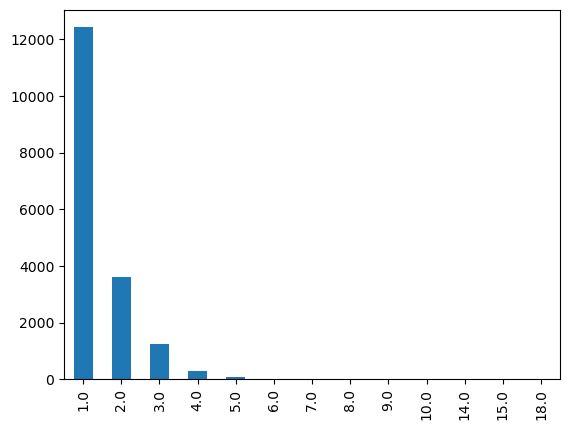

In [29]:
#looking the distribution of the variable 
df.bedrooms.value_counts().plot.bar();

In [30]:
#using np.select()
conditions = [df.bedrooms == 1,
               df.bedrooms == 2,
               df.bedrooms == 3,
               df.bedrooms > 3]

results = ['01_One','02_Two','03_Three','04_Four or more']

df['bedrooms_disc'] = np.select(conditions, results, default = -999)

In [31]:
df.bedrooms_disc.value_counts()

01_One             12422
02_Two              3617
03_Three            1228
04_Four or more      443
Name: bedrooms_disc, dtype: int64

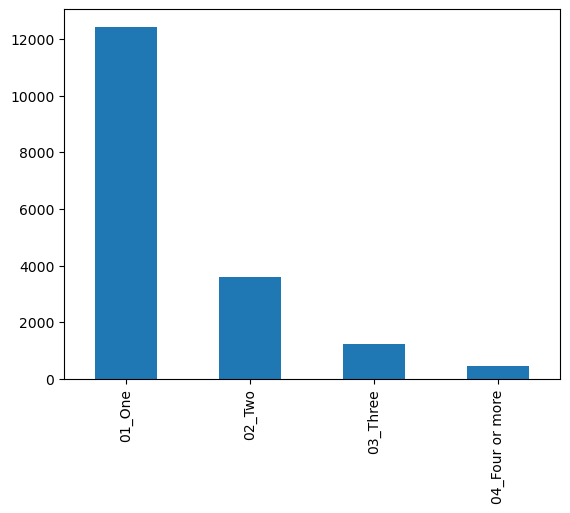

In [32]:
df.bedrooms_disc.value_counts().plot.bar();

### Discretizing 'accommodates', 'beds' y 'number_of_reviews'

Using pd.qcut() to discretize to percentile 0, 0.5, 0.8, 1  

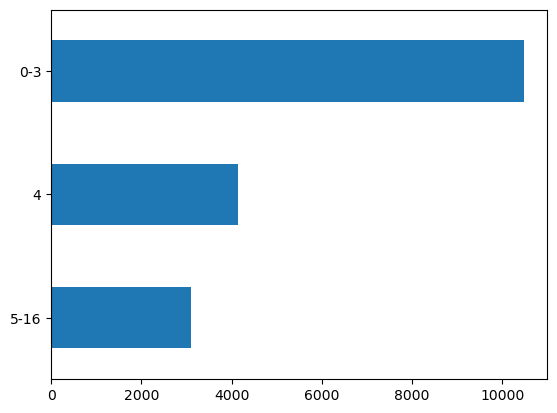

In [33]:
df['accommodates_disc'] = pd.qcut(df.accommodates,[0, 0.5, 0.8, 1],
                                 labels = ['0-3','4','5-16'])

df['accommodates_disc'].value_counts().sort_index(ascending = False).plot.barh();

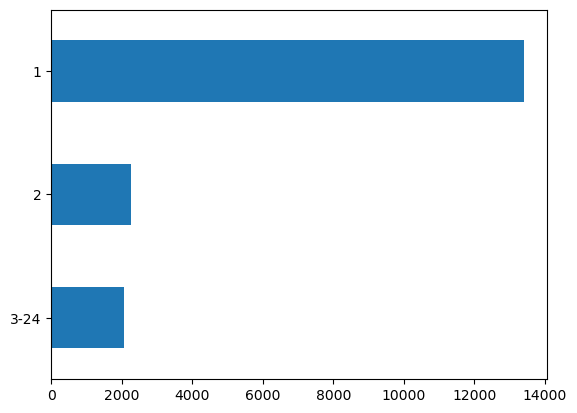

In [34]:
df['beds_disc'] = pd.qcut(df.beds,[0, 0.5, 0.8, 1],
                         labels = ['1','2','3-24'])

df['beds_disc'].value_counts().sort_index(ascending = False).plot.barh();

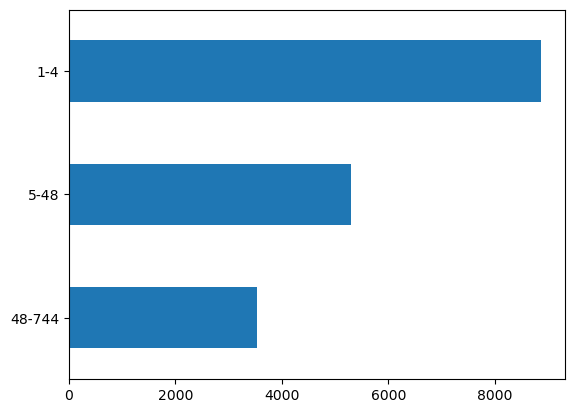

In [35]:
df['number_of_reviews_disc'] = pd.qcut(df.number_of_reviews,[0, 0.5, 0.8, 1],
                                      labels = ['1-4','5-48','48-744'])

df['number_of_reviews_disc'].value_counts().sort_index(ascending = False).plot.barh();

## Buying price

The additional dataset added in the previous notebook contains the price per square meter, but the dataframe lacks information about the size of the properties. Consequently, I have chosen to make an estimate based on the number of bedrooms in each property.

### Estimation of the size of the properties

The criteria is the following:

* 1 bedroom = 50m2
* 2 bedrooms = 70m2
* 3 bedrooms = 90m2
* 4 bedrooms = 120m2
* 5 or more bedrooms = 150m2

In [36]:
conditions = [df.bedrooms == 1,
               df.bedrooms == 2,
               df.bedrooms == 3,
               df.bedrooms == 4,
               df.bedrooms > 4]

results = [50,70,90,120,150]

df['m2'] = np.select(conditions, results, default = -999)

In [37]:
df['m2'].value_counts()

50     12422
70      3617
90      1228
120      296
150      147
Name: m2, dtype: int64

### Determine the price of the properties

It will subtract 30% from the full price as a result of the price negotiation.

In [39]:
df['buying_price'] = df.m2 * df.price_m2 * 0.7

In [40]:
df[['bedrooms','m2','district','price_m2','buying_price']].head(20)

,bedrooms,m2,district,price_m2,buying_price
0,1.0,50,Chamartín,5098,178430.0
1,1.0,50,Latina,2267,79345.0
2,3.0,90,Arganzuela,4085,257355.0
3,1.0,50,Centro,4827,168945.0
4,1.0,50,Arganzuela,4085,142975.0
5,3.0,90,Arganzuela,4085,257355.0
6,1.0,50,Centro,4827,168945.0
7,1.0,50,Centro,4827,168945.0
8,2.0,70,Centro,4827,236523.0
9,1.0,50,Centro,4827,168945.0


## Location

Given that the dataframe contains latitude and longitude data, and considering the significance of location to key tourist attractions, it would be highly beneficial to include a variable that represents the distance from the building to a point of interest.

In this case, I have chosen La Puerta del Sol, a highly popular location in Madrid. The coordinates for this place were obtained from the following source: https://www.123coordenadas.com/coordinates/81497-puerta-del-sol-madrid

Latitude: 40.4167278
Longitude: -3.7033387

### Calculating the distance from each property to La Puerta del Sol

There is a formula for calculating the distance from each property to La Puerta del Sol, known as the Haversine formula.

The Python function derived from this formula was obtained from the following source: https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points

In [41]:
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):

      R = 6372.8 

      dLat = radians(lat2 - lat1)
      dLon = radians(lon2 - lon1)
      lat1 = radians(lat1)
      lat2 = radians(lat2)

      a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
      c = 2*asin(sqrt(a))

      return R * c

In [42]:
# Coordinates of La Puerta del Sol
lat1 = 40.4167278
lon1 = -3.7033387

df['pdi_sol'] = df.apply(lambda row: haversine(lat1,lon1,row.latitude,row.longitude),axis = 1)

In [44]:
df.groupby('district').pdi_sol.mean().sort_values()

district
Centro                    0.730611
Arganzuela                1.939114
Chamberí                  2.133167
Retiro                    2.450593
Salamanca                 2.715975
Moncloa - Aravaca         3.294526
Usera                     3.928874
Latina                    3.942634
Carabanchel               3.970238
Chamartín                 4.432842
Puente de Vallecas        4.481127
Tetuán                    4.624605
Moratalaz                 5.073901
Ciudad Lineal             5.231293
Villaverde                7.664192
Fuencarral - El Pardo     8.062301
Hortaleza                 8.074184
San Blas - Canillejas     8.199011
Vicálvaro                 8.599559
Villa de Vallecas         9.176618
Barajas                  11.439064
Name: pdi_sol, dtype: float64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17710 entries, 0 to 17709
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              17710 non-null  int64   
 1   name                            17707 non-null  object  
 2   host_id                         17710 non-null  int64   
 3   neighbourhood_group             17710 non-null  object  
 4   neighbourhood                   17710 non-null  object  
 5   latitude                        17710 non-null  float64 
 6   longitude                       17710 non-null  float64 
 7   room_type                       17710 non-null  object  
 8   price                           17710 non-null  int64   
 9   minimum_nights                  17710 non-null  int64   
 10  calculated_host_listings_count  17710 non-null  int64   
 11  availability_365                17710 non-null  int64   
 12  description       

# Saving the Dataframe

In [46]:
df.to_csv('../Data/Apartment_rental_df_prepared.csv')